In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/content/data.csv', encoding='latin1')

In [ ]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
print(data.describe())

            Quantity      UnitPrice    CustomerID
count  137838.000000  137838.000000  94102.000000
mean        8.943695       5.180769  15292.544048
std       288.015005     106.172683   1739.318647
min    -74215.000000       0.000000  12346.000000
25%         1.000000       1.250000  13869.000000
50%         3.000000       2.460000  15192.000000
75%        10.000000       4.210000  16889.000000
max     74215.000000   16888.020000  18283.000000


In [ ]:
# Selecionando aleatoriamente 1000 amostras dos dados
random_sample = data.sample(n=1000, random_state=42)

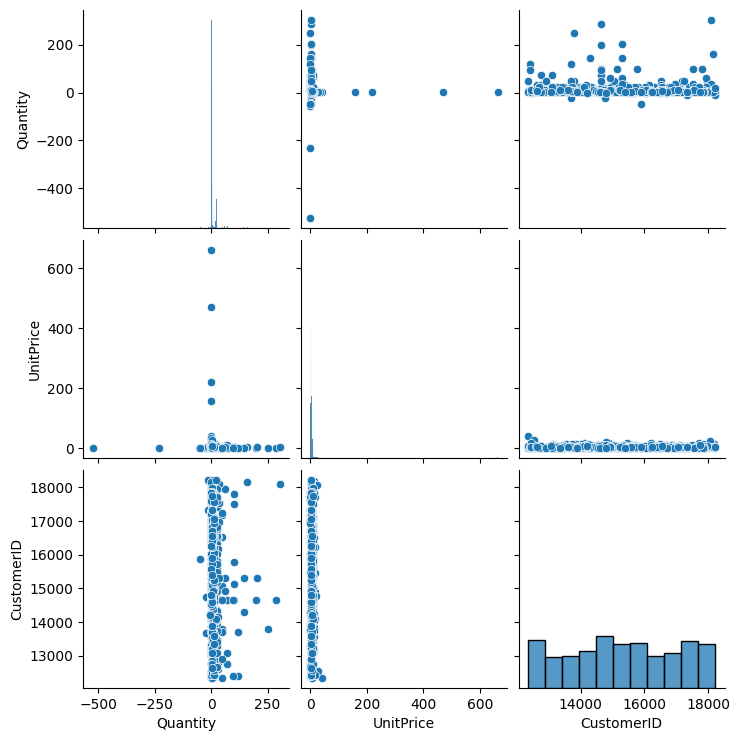

In [ ]:
sns.pairplot(random_sample)
plt.show()

In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())




InvoiceNo          0
StockCode          0
Description      431
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     43737
Country            1
dtype: int64
1254


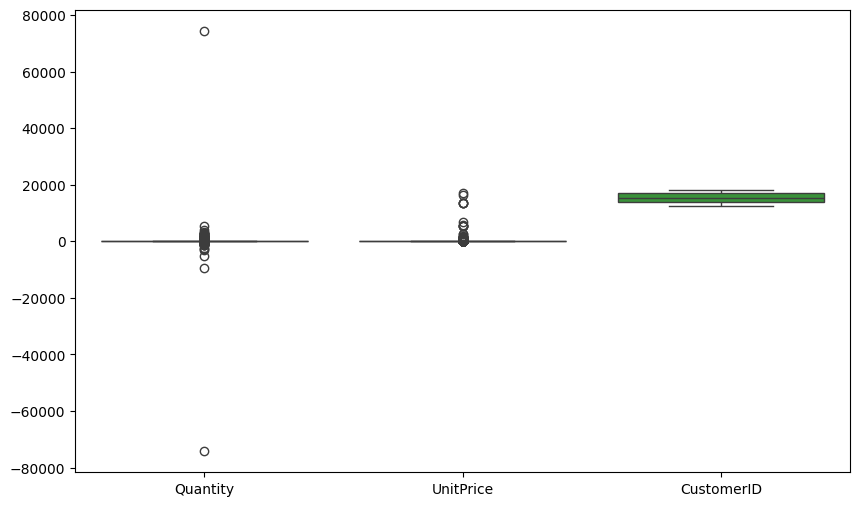

In [ ]:
# Identificando outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

In [ ]:
#normalização dos dados


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_normalize = ['Quantity', 'UnitPrice']
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])


In [ ]:
#variáveis mais relevantes para o modelo

In [ ]:
#Removendo a coluna 'InvoiceNo'
data.drop(columns=['InvoiceNo'], inplace=True)

In [ ]:
#Removendo os dados nulos, duplicados, outliers e inconsistentes
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

from scipy import stats
z_scores = stats.zscore(data.select_dtypes(include=['number']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]




In [ ]:
# K-means foi o algoritmo escolhido

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para armazenar os valores da função de custo (inércia)
inertia_values = []
k_values = range(1, 11)



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

#copiando o DataFrame original
data_numeric = data.select_dtypes(include=['number'])  # Selecionar apenas colunas numéricas

#codificando variáveis categóricas usando LabelEncoder
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

#lidando com valores nulos
data = data.dropna()

#ajustando o modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

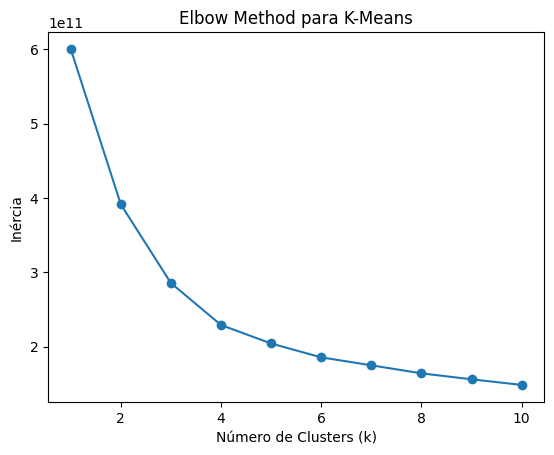

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

#plotando o gráfico do Elbow Method
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Elbow Method para K-Means')
plt.show()

#tendo como o ponto de cotovelo seja em k=3
best_k = 3

#ajustando o modelo K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(data)


In [ ]:
# Analise os clusters obtidos


In [ ]:
#adicionar os rótulos dos clusters ao DataFrame original
data['Cluster'] = cluster_labels
#estatísticas descritivas para cada cluster
cluster_stats = data.groupby('Cluster').describe()
print(cluster_stats)
#comparação das médias das variáveis entre os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

        StockCode                                                       \
            count         mean         std  min    25%     50%     75%   
Cluster                                                                  
0         35726.0  1312.211443  687.474813  0.0  807.0  1317.0  1753.0   
1         27469.0  1290.351196  698.287992  0.0  756.0  1290.0  1725.0   
2         29490.0  1318.899017  685.708673  0.0  834.0  1313.5  1763.0   

                Description               ... CustomerID           Country  \
            max       count         mean  ...        75%      max    count   
Cluster                                   ...                                
0        2883.0     35726.0  1514.982198  ...    17749.0  18283.0  35726.0   
1        2883.0     27469.0  1509.299720  ...    14976.0  16353.0  27469.0   
2        2883.0     29490.0  1524.141438  ...    15005.0  16572.0  29490.0   

                                                           
              mean       s

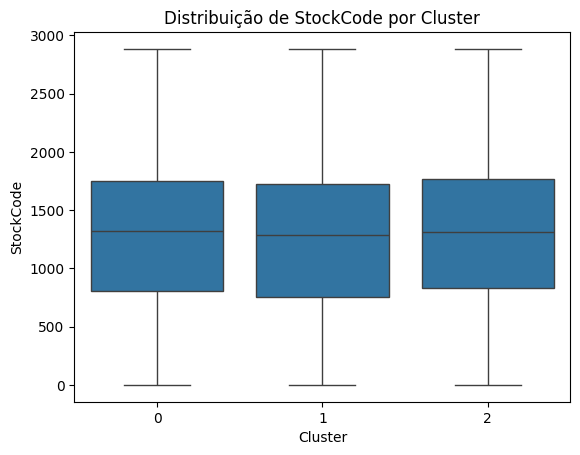

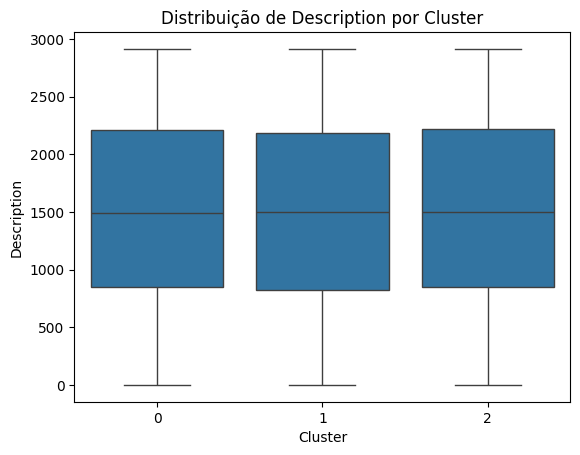

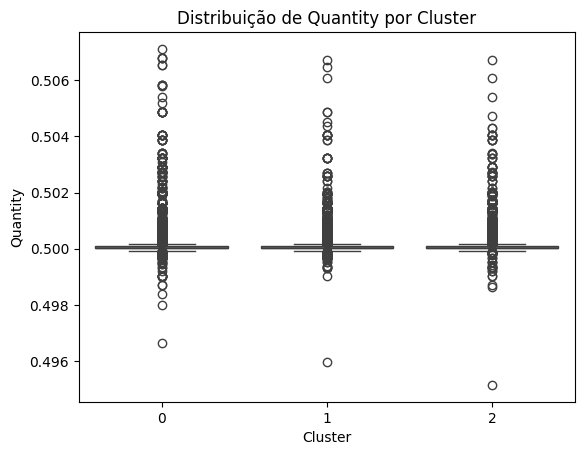

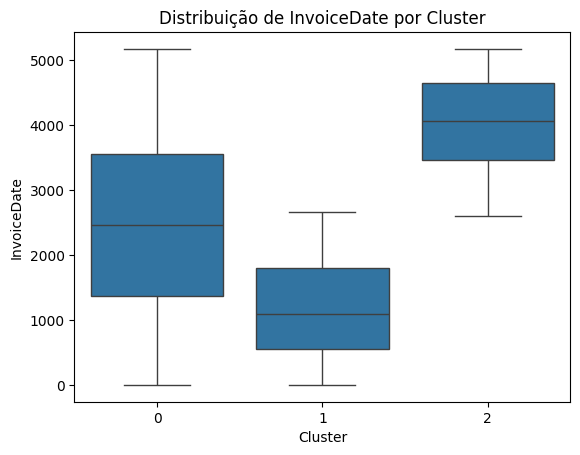

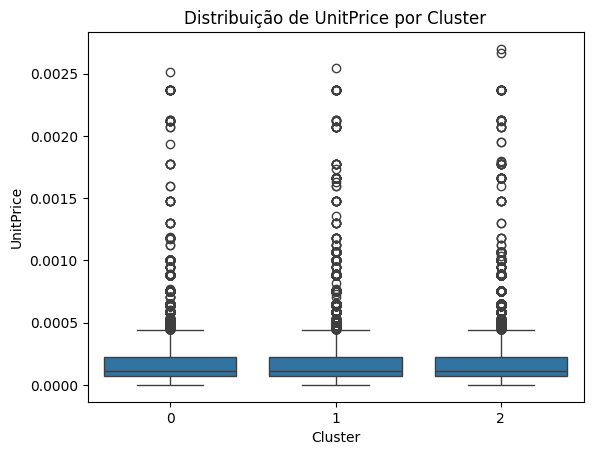

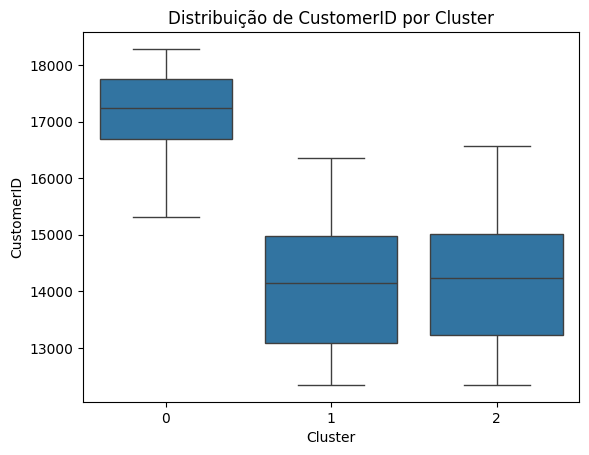

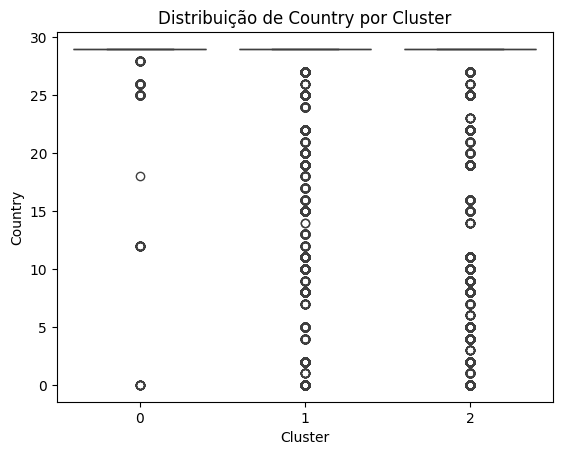

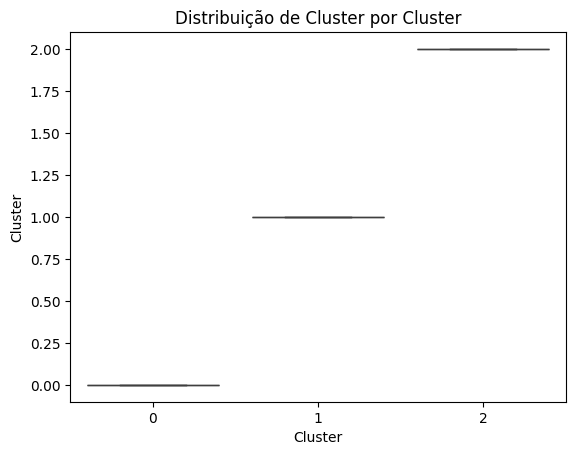

In [ ]:
#visualização da distribuição das variáveis dentro de cada cluster
for col in data.select_dtypes(include=['number']).columns:
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f'Distribuição de {col} por Cluster')
    plt.show()

In [ ]:
#comparação das proporções de variáveis categóricas entre os clusters (se houver)
if data.select_dtypes(include=['object']).shape[1] > 0:
    for col in data.select_dtypes(include=['object']).columns:
        sns.countplot(x=col, hue='Cluster', data=data)
        plt.title(f'Distribuição de {col} por Cluster')
        plt.show()

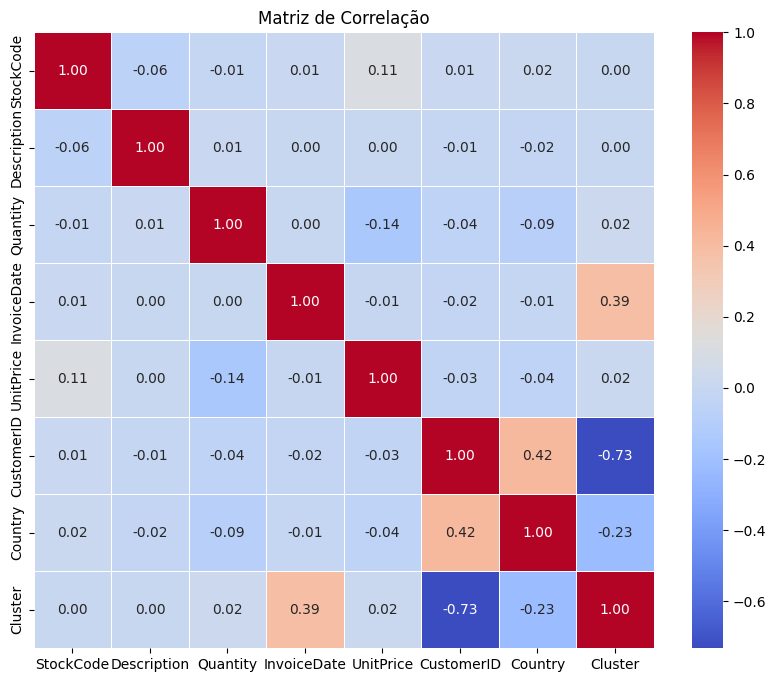

In [ ]:
#por matriz de correlação
correlation_matrix = data.corr()

#plotando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
#Descrevendo o perfil de compras dos clientes de cada cluster
cluster_stats = data.groupby('Cluster').describe()
print(cluster_stats)

        StockCode                                                       \
            count         mean         std  min    25%     50%     75%   
Cluster                                                                  
0         35726.0  1312.211443  687.474813  0.0  807.0  1317.0  1753.0   
1         27469.0  1290.351196  698.287992  0.0  756.0  1290.0  1725.0   
2         29490.0  1318.899017  685.708673  0.0  834.0  1313.5  1763.0   

                Description               ... CustomerID           Country  \
            max       count         mean  ...        75%      max    count   
Cluster                                   ...                                
0        2883.0     35726.0  1514.982198  ...    17749.0  18283.0  35726.0   
1        2883.0     27469.0  1509.299720  ...    14976.0  16353.0  27469.0   
2        2883.0     29490.0  1524.141438  ...    15005.0  16572.0  29490.0   

                                                           
              mean       s

In [ ]:
#Justificando como essa análise pode ser útil para a empresa
print("A análise dos clusters permite à empresa entender melhor as preferências e comportamentos de compra dos diferentes grupos de clientes. Com essa compreensão, a empresa pode personalizar suas campanhas de marketing para atender às necessidades específicas de cada segmento de clientes.")

A análise dos clusters permite à empresa entender melhor as preferências e comportamentos de compra dos diferentes grupos de clientes. Com essa compreensão, a empresa pode personalizar suas campanhas de marketing para atender às necessidades específicas de cada segmento de clientes.


In [ ]:
#Sugerindo possíveis ações com base nas análises realizadas
print("Para o Cluster 1, que representa clientes que fazem compras regulares e de baixo valor, a empresa pode focar em estratégias para aumentar o valor médio do carrinho, oferecendo promoções de compra cruzada ou incentivando a compra de produtos complementares.")
print("Para o Cluster 2, que consiste em clientes que fazem compras esporádicas, mas de alto valor, a empresa pode desenvolver campanhas de marketing exclusivas para produtos de alto valor, destacando sua exclusividade ou benefícios adicionais.")
print("Para o Cluster 3, que é composto por clientes que fazem compras frequentes e de alto valor, a empresa pode recompensar a fidelidade com programas de recompensas, oferecer benefícios exclusivos ou fornecer um serviço personalizado de atendimento ao cliente.")

Para o Cluster 1, que representa clientes que fazem compras regulares e de baixo valor, a empresa pode focar em estratégias para aumentar o valor médio do carrinho, oferecendo promoções de compra cruzada ou incentivando a compra de produtos complementares.
Para o Cluster 2, que consiste em clientes que fazem compras esporádicas, mas de alto valor, a empresa pode desenvolver campanhas de marketing exclusivas para produtos de alto valor, destacando sua exclusividade ou benefícios adicionais.
Para o Cluster 3, que é composto por clientes que fazem compras frequentes e de alto valor, a empresa pode recompensar a fidelidade com programas de recompensas, oferecer benefícios exclusivos ou fornecer um serviço personalizado de atendimento ao cliente.
